In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

# Loading Dataset

In [2]:
df = pd.read_csv('resource/train_amazon.csv',delimiter=',', encoding='ISO-8859-1',nrows=300000)
df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [3]:
df.shape

(300000, 3)

# Data Cleaning and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      --------------   ----- 
 0   2                                  

In [5]:
df.isnull().sum()

2                                                                                                                                                                                                                                                                                                                                                                                                              0
Stuning even for the non-gamer                                                                                                                                                                                                                                                                                                                                                                                26
This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games

In [6]:
#Simplifying the names of columns
df.columns = ['sentiment','heading', 'text']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  300000 non-null  int64 
 1   heading    299974 non-null  object
 2   text       300000 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [8]:
df['sentiment'].value_counts()

sentiment
2    152071
1    147929
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

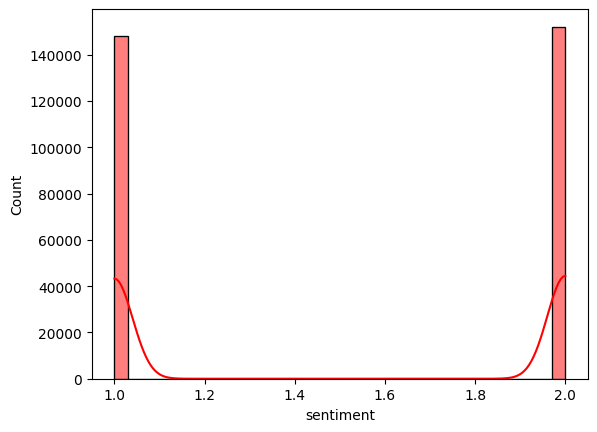

In [9]:

sns.histplot(df['sentiment'], kde=True, color = 'r')

<Axes: xlabel='sentiment', ylabel='count'>

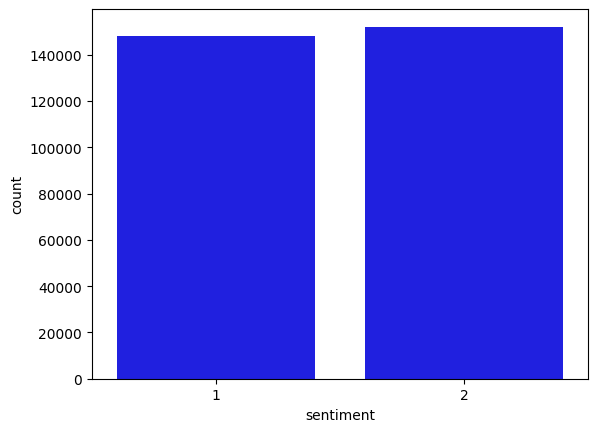

In [10]:
sns.countplot(x=df['sentiment'] , color= 'b')

# Text Preprocessing

In [11]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

300000
I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.


In [12]:
final_corpus = []
final_corpus_joined = []
for i in df.index:
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [13]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [14]:
data_cleaned

,text,sentiment
0,read lot review say best game soundtrack figur...,2
1,soundtrack favorit music time hand intens sad ...,2
2,truli like soundtrack enjoy video game music p...,2
3,play game know divin music everi singl song te...,2
4,quit sure actual take time read play game leas...,2
...,...,...
299995,air purifi huge even low loud drown sound tv w...,1
299996,bought two great product work great fresher ai...,2
299997,prior use purifi could spend much time basemen...,2
299998,bought air purifi year old daughter hous dust ...,2


In [15]:
#This df is created for wordcloud only
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[read, lot, review, say, best, game, soundtrac...",2
1,"[soundtrack, favorit, music, time, hand, inten...",2
2,"[truli, like, soundtrack, enjoy, video, game, ...",2
3,"[play, game, know, divin, music, everi, singl,...",2
4,"[quit, sure, actual, take, time, read, play, g...",2


# Word Cloud

In [16]:
positive = data_eda[data_eda['sentiment'] == 2]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 1]
negative_list = negative['text'].tolist()

In [17]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

**For Positives**

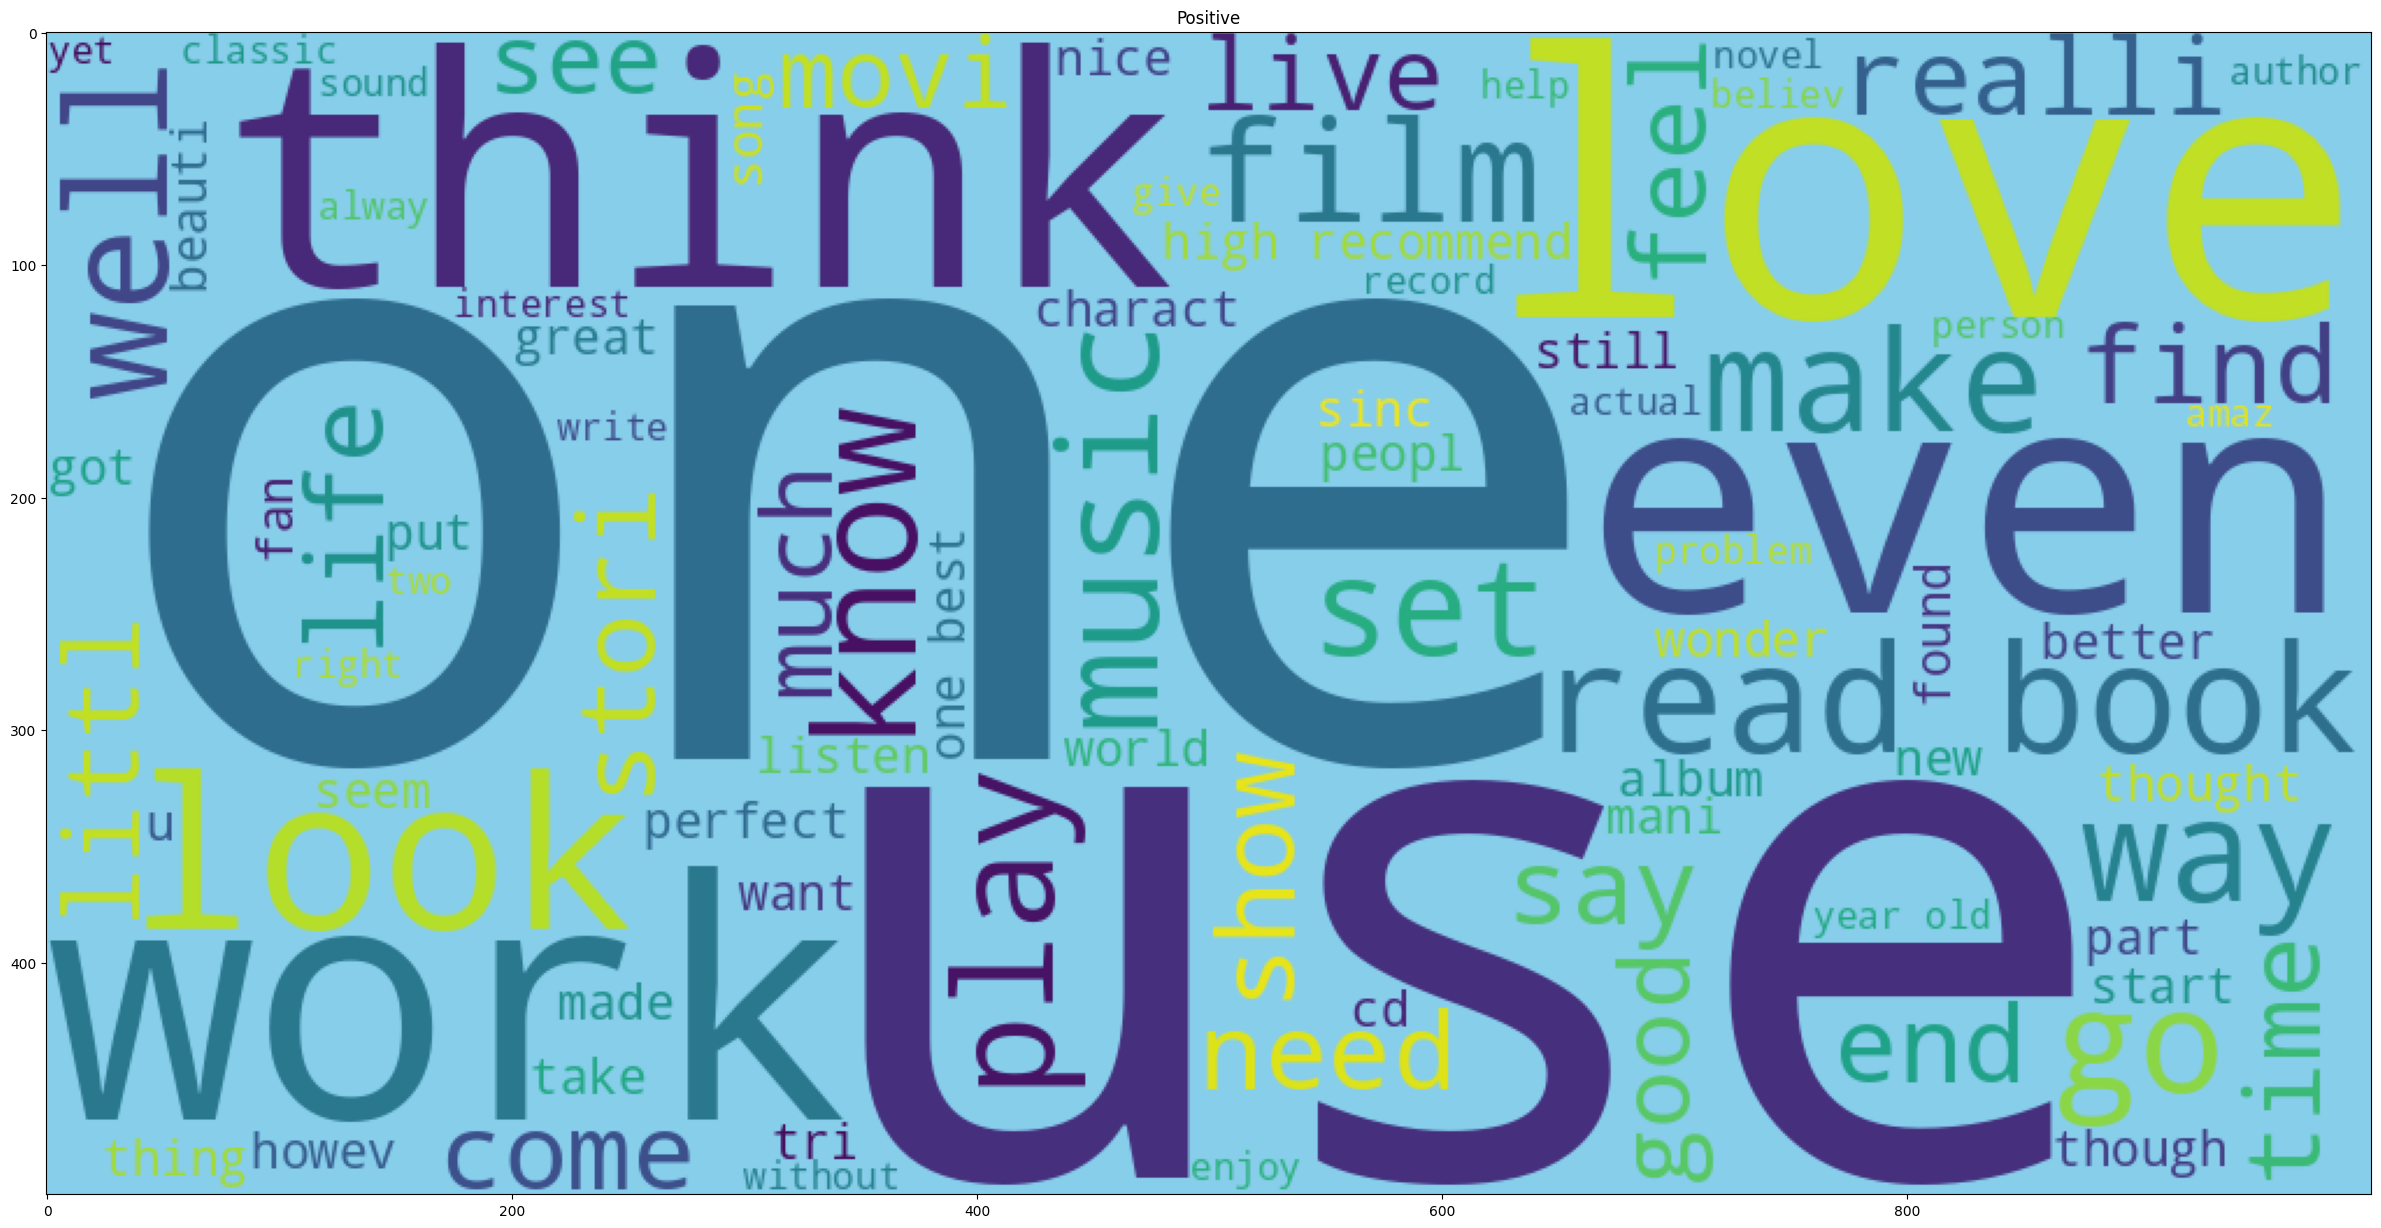

In [18]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

**For Negatives**

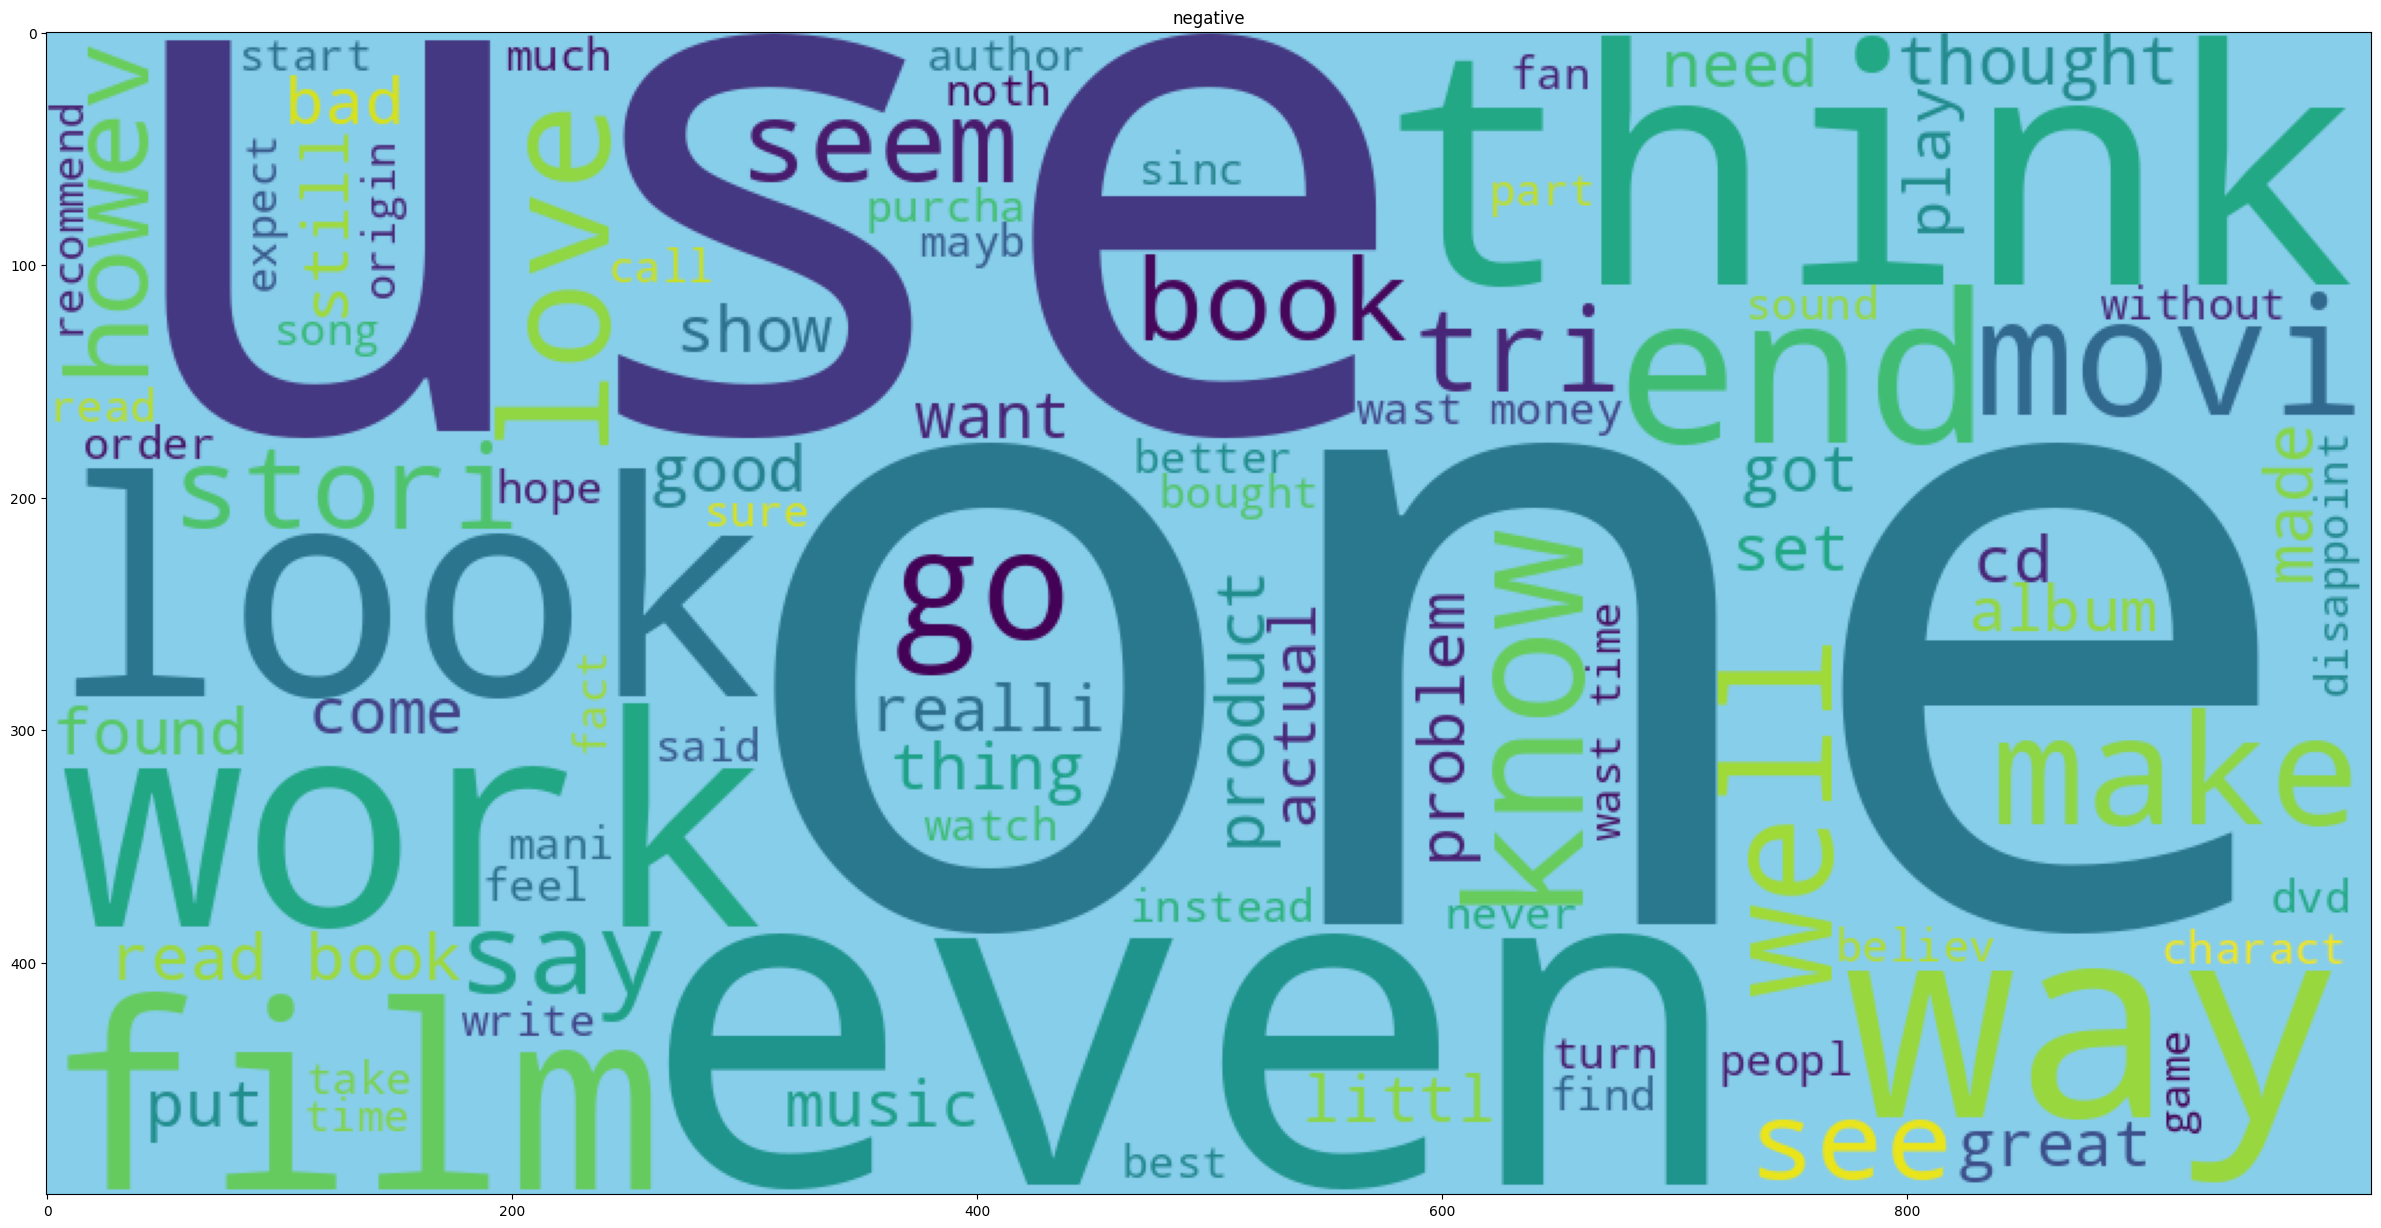

In [19]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# Model Building

In [20]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

**Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
#Showing Model Summary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
print('Accuracy:',accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8629166666666667

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86     29562
           2       0.86      0.87      0.87     30438

    accuracy                           0.86     60000
   macro avg       0.86      0.86      0.86     60000
weighted avg       0.86      0.86      0.86     60000



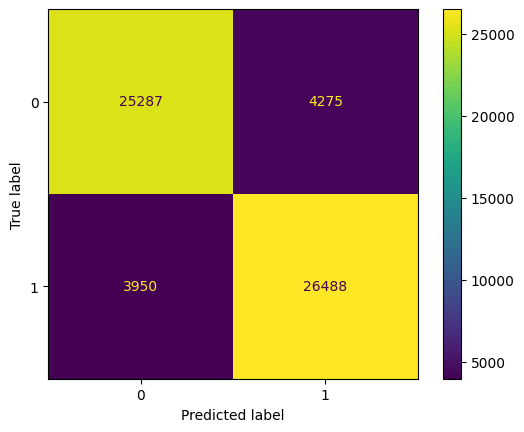

In [26]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

In [27]:
import pickle
pickle_out = open('resource/output/logistic.pkl','wb')
pickle.dump(model, pickle_out)
pickle_out.close()


In [30]:
from nltk.stem import PorterStemmer
def pre_processor(review):
    review = review.strip()

    # Convert to lowercase
    review = review.lower()

    # Remove non-English characters
    review = re.sub(r'[^a-zA-Z\s]', '', review)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    review = ' '.join([word for word in word_tokenize(review) if word.lower() not in stop_words])

    # Apply stemming
    stemmer = PorterStemmer()
    review = ' '.join([stemmer.stem(word) for word in word_tokenize(review)])
    return review

In [34]:
def sentiment_analysis(text):
    # Preprocess the input text
    preprocessed_text = pre_processor(text)
    
    # Transform the text using the trained tfidf_vectorizer
    features = tfid.transform([preprocessed_text])
    
    # Predict using the trained classifier
    prediction = model.predict(features)[0]
    
    # Return the sentiment
    if prediction == 1:
        return "Negative"
    else:
        return "Positive"

In [35]:
sentiment_analysis('It is terrible')

'Negative'

In [36]:
sentiment_analysis('It is so good')

'Positive'